In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"C:\Users\sanke\Desktop\java references\state-wise-crop-production-India_original.csv")

In [3]:
df.head()
# first 5 rows of data set

,State,Year,Crop,Area,Production
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10704 entries, 0 to 10703
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   State       10704 non-null  object 
 1   Year        10704 non-null  int64  
 2   Crop        10704 non-null  object 
 3   Area        10704 non-null  float64
 4   Production  10704 non-null  float64
dtypes: float64(2), int64(1), object(2)
memory usage: 418.2+ KB


In [5]:
df.shape
# shape of the data set

(10704, 5)

In [6]:
df.dtypes
# data type of the column

State          object
Year            int64
Crop           object
Area          float64
Production    float64
dtype: object

In [7]:
df.describe()
#descriptive statics of all the features

,Year,Area,Production
count,10704.000000,1.070400e+04,1.070400e+04
mean,2006.134342,2.126362e+05,1.115409e+07
std,3.973598,7.238971e+05,2.263971e+08
min,2000.000000,1.000000e+00,0.000000e+00
25%,2003.000000,1.506000e+03,1.500000e+03
50%,2006.000000,1.096650e+04,1.551650e+04
75%,2010.000000,9.252500e+04,1.424018e+05
max,2013.000000,1.237800e+07,6.326000e+09


In [8]:
df.corr()
# correlation between the columns

,Year,Area,Production
Year,1.000000,0.019558,0.010842
Area,0.019558,1.000000,0.038026
Production,0.010842,0.038026,1.000000


<AxesSubplot:>

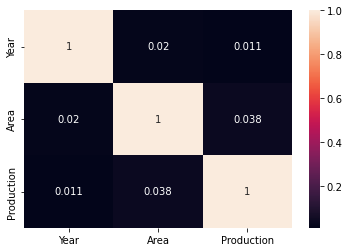

In [9]:
sns.heatmap(df.corr(), annot=True)

In [10]:
df["Crop"].value_counts()
# checking frequency of each crop all over the world.

Rice                   414
Sugarcane              370
Maize                  365
Wheat                  345
Sesamum                322
                      ... 
Bean                     1
Arcanut (Processed)      1
Atcanut (Raw)            1
Cashewnut Processed      1
Kapas                    1
Name: Crop, Length: 122, dtype: int64

In [11]:
df["Crop"].unique()
# checking all the crops which cultivated in india in 2000 to 2013

array(['Arecanut', 'Banana', 'Cashewnut', 'Coconut ', 'Dry ginger',
       'Other Kharif pulses', 'other oilseeds', 'Rice', 'Sugarcane',
       'Sweet potato', 'Tapioca', 'Black pepper', 'Dry chillies',
       'Turmeric', 'Arhar/Tur', 'Groundnut', 'Maize', 'Moong(Green Gram)',
       'Sunflower', 'Urad', 'Bajra', 'Castor seed', 'Coriander',
       'Cotton(lint)', 'Gram', 'Horse-gram', 'Jowar', 'Korra', 'Linseed',
       'Mesta', 'Niger seed', 'Onion', 'Other  Rabi pulses',
       'other misc. pulses', 'Potato', 'Ragi', 'Rapeseed &Mustard',
       'Safflower', 'Samai', 'Sesamum', 'Small millets', 'Tobacco',
       'Varagu', 'Wheat', 'Beans & Mutter(Vegetable)', 'Bhindi',
       'Bottle Gourd', 'Brinjal', 'Cabbage', 'Citrus Fruit', 'Cucumber',
       'Grapes', 'Mango', 'Orange', 'other fibres', 'Other Fresh Fruits',
       'Other Vegetables', 'Papaya', 'Peas  (vegetable)', 'Pome Fruit',
       'Soyabean', 'Tomato', 'Garlic', 'Ginger', 'Cowpea(Lobia)', 'Lemon',
       'Pome Granet', 'Sapo

In [12]:
df["Crop"].unique().size
#  checking number of different  crops which cultivated in india in 2000 to 2013

122

In [13]:
df_year=df.groupby("Year").mean()

#grouping the data based on year and mean of Area and production

In [14]:
df_year.head()

,Area,Production
Year,,
2000,210034.913596,9.465958e+06
2001,218068.080040,9.848998e+06
2002,161814.376626,7.894313e+06
2003,179071.902747,8.239306e+06
2004,217177.781022,1.059439e+07


<BarContainer object of 14 artists>

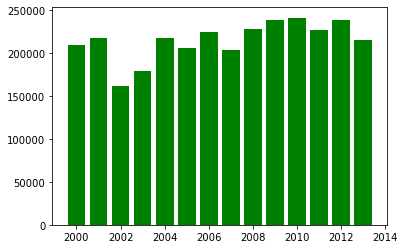

In [15]:
plt.bar(df_year.index,df_year["Area"],color='g')

# Visualisation the Area of cultivation in each year

<BarContainer object of 14 artists>

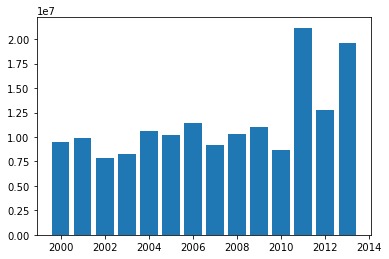

In [16]:
plt.bar(df_year.index,df_year["Production"])

# visualisation of production of crops in each year.

In [17]:
df["year_bin"]=pd.cut(x=df.Year,bins=[1999,2006,2013],labels=["bin_1","bin_2"])

# binning the data based on the year to analyse the crop production before and after 2007 (bin1 and bin 2 respectively)

In [18]:
df.head()

,State,Year,Crop,Area,Production,year_bin
0,Andaman and Nicobar Islands,2000,Arecanut,4354.0,7200.0,bin_1
1,Andaman and Nicobar Islands,2000,Banana,1707.0,12714.0,bin_1
2,Andaman and Nicobar Islands,2000,Cashewnut,800.0,219.0,bin_1
3,Andaman and Nicobar Islands,2000,Coconut,25160.0,89000000.0,bin_1
4,Andaman and Nicobar Islands,2000,Dry ginger,388.0,1220.0,bin_1


In [19]:
df[df["year_bin"]=="bin_1"].Area.mean()

# Average area of cultivation of crops in india before 2007

200200.5340430663

In [20]:
df[df["year_bin"]=="bin_2"].Area.mean()

# Average area of cultivation of crops in india after 2007

227371.711673811

In [21]:
df[df["year_bin"]=="bin_1"].Crop.value_counts()

# frequency of  each crop in the country before 2007


Rice                   224
Sugarcane              200
Maize                  197
Wheat                  184
Rapeseed &Mustard      176
                      ... 
Kapas                    1
Arcanut (Processed)      1
Atcanut (Raw)            1
Cashewnut Processed      1
Other Dry Fruit          1
Name: Crop, Length: 109, dtype: int64

In [22]:
df[df["year_bin"]=="bin_2"].Crop.value_counts()
# frequency of  each crop in the country after 2007

Rice                  190
Sugarcane             170
Maize                 168
Wheat                 161
Urad                  151
                     ... 
Bean                    1
Tea                     1
Other Vegetables        1
Other Fresh Fruits      1
Ricebean (nagadal)      1
Name: Crop, Length: 81, dtype: int64

In [23]:
df[df["year_bin"]=="bin_1"].Production.mean()

#Mean of production before 2007

9551302.460485792

In [24]:
df[df["year_bin"]=="bin_2"].Production.mean()

#Mean of production after 2007

13053298.78688712

In [25]:
df[df.year_bin=="bin_1"].groupby("Crop").mean().drop("Year",axis=1).sort_values(by="Area",ascending=False)

,Area,Production
Crop,,
Rice,1.336448e+06,2.669089e+06
Wheat,1.004634e+06,2.689370e+06
Guar seed,7.834127e+05,1.731865e+05
Bajra,5.102169e+05,4.265433e+05
Jowar,4.772946e+05,3.712271e+05
...,...,...
Peas (vegetable),5.600000e+01,0.000000e+00
Peach,2.100000e+01,0.000000e+00
Litchi,1.250000e+01,0.000000e+00


In [26]:
df[df.year_bin=="bin_2"].groupby("Crop").mean().drop("Year",axis=1).sort_values(by="Area",ascending=False)

,Area,Production
Crop,,
Rice,1.569675e+06,3.553451e+06
Paddy,1.431099e+06,2.785651e+06
Wheat,1.175566e+06,3.648029e+06
Soyabean,6.883419e+05,7.688301e+05
Guar seed,5.111161e+05,1.989506e+05
...,...,...
Sannhamp,1.474339e+03,1.904860e+03
Pump Kin,1.228500e+03,0.000000e+00
Jobster,1.170000e+03,1.180000e+03


In [27]:
df[df.year_bin=="bin_1"].groupby("Crop").mean().drop("Year",axis=1).sort_values(by="Production",ascending=False)

,Area,Production
Crop,,
Coconut,1.742703e+05,7.460589e+08
Sugarcane,1.438481e+05,9.519614e+06
Wheat,1.004634e+06,2.689370e+06
Rice,1.336448e+06,2.669089e+06
Jute,1.197511e+05,1.461420e+06
...,...,...
Other Dry Fruit,7.000000e+00,0.000000e+00
Pome Granet,5.825000e+02,0.000000e+00
Peach,2.100000e+01,0.000000e+00


In [28]:
df[df.year_bin=="bin_2"].groupby("Crop").mean().drop("Year",axis=1).sort_values(by="Production",ascending=False)

,Area,Production
Crop,,
Coconut,2.238100e+05,1.162465e+09
Sugarcane,1.892423e+05,1.322031e+07
Wheat,1.175566e+06,3.648029e+06
Rice,1.569675e+06,3.553451e+06
Paddy,1.431099e+06,2.785651e+06
...,...,...
Lentil,2.070000e+03,1.680000e+03
Perilla,2.350000e+03,1.410000e+03
Jobster,1.170000e+03,1.180000e+03


# VISUALISATIONS

<AxesSubplot:xlabel='Area', ylabel='Density'>

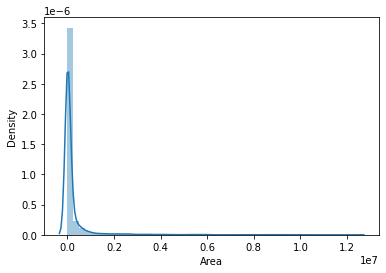

In [29]:
sns.distplot(df.Area)

<AxesSubplot:xlabel='Production', ylabel='Density'>

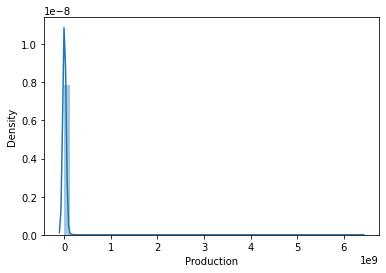

In [30]:
sns.distplot(df.Production)

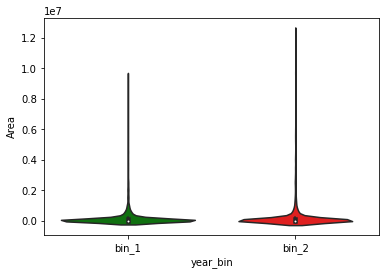

In [31]:
sns.violinplot("year_bin", "Area", data=df,
               palette=["green", "red"]);

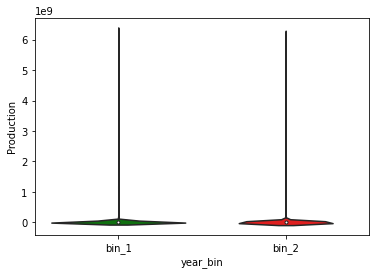

In [32]:
sns.violinplot("year_bin", "Production", data=df,
               palette=["green", "red"]);

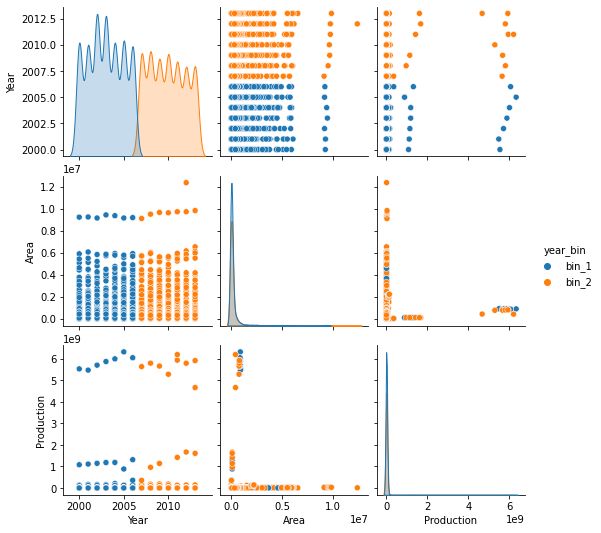

In [33]:
sns.pairplot(df, hue='year_bin', size=2.5);

# Comparison of AP stats with National

In [34]:
df[df.State=="Andhra Pradesh"]

# analysing the agriculture starts of Andhra Pradesh

,State,Year,Crop,Area,Production,year_bin
93,Andhra Pradesh,2000,Arecanut,262.0,724.0,bin_1
94,Andhra Pradesh,2000,Arhar/Tur,254599.0,126443.0,bin_1
95,Andhra Pradesh,2000,Bajra,98323.0,121260.0,bin_1
96,Andhra Pradesh,2000,Banana,46908.0,780053.0,bin_1
97,Andhra Pradesh,2000,Cashewnut,135225.0,29443.0,bin_1
...,...,...,...,...,...,...
684,Andhra Pradesh,2013,Tobacco,143033.0,275988.0,bin_2
685,Andhra Pradesh,2013,Tomato,37441.0,889385.0,bin_2
686,Andhra Pradesh,2013,Turmeric,17865.0,152228.0,bin_2
687,Andhra Pradesh,2013,Urad,264773.0,206704.0,bin_2


In [35]:
df_ap=df[df.State=="Andhra Pradesh"]

In [36]:
df_ap["year_bin"]=pd.cut(x=df_ap.Year,bins=[1999,2006,2013],labels=["bin_1","bin_2"])

In [37]:
df_ap.head()

,State,Year,Crop,Area,Production,year_bin
93,Andhra Pradesh,2000,Arecanut,262.0,724.0,bin_1
94,Andhra Pradesh,2000,Arhar/Tur,254599.0,126443.0,bin_1
95,Andhra Pradesh,2000,Bajra,98323.0,121260.0,bin_1
96,Andhra Pradesh,2000,Banana,46908.0,780053.0,bin_1
97,Andhra Pradesh,2000,Cashewnut,135225.0,29443.0,bin_1


In [38]:
df_ap[df_ap["year_bin"]=="bin_1"].Area.mean()

161105.3924050633

In [39]:
df_ap[df_ap["year_bin"]=="bin_2"].Area.mean()

181583.38571428572

In [40]:
df_ap[df_ap["year_bin"]=="bin_1"].Production.mean()

25641047.566455696

In [41]:
df_ap[df_ap["year_bin"]=="bin_2"].Production.mean()

25065604.096428573

In [42]:
df_ap[df_ap["year_bin"]=="bin_1"].Crop.value_counts()

Niger seed             7
Moong(Green Gram)      7
Onion                  7
Other  Rabi pulses     7
Other Kharif pulses    7
                      ..
Bottle Gourd           2
Tomato                 2
other fibres           1
Peas  (vegetable)      1
other misc. pulses     1
Name: Crop, Length: 61, dtype: int64

In [43]:
df_ap[df_ap["year_bin"]=="bin_1"].Crop.value_counts()["Rice"]

7

In [44]:
df_ap[df_ap["year_bin"]=="bin_2"].Crop.value_counts()

Arhar/Tur              7
Onion                  7
Bajra                  7
Urad                   7
Tobacco                7
Sunflower              7
Sugarcane              7
Sesamum                7
Rice                   7
Ragi                   7
Other Kharif pulses    7
Small millets          7
Moong(Green Gram)      7
Mesta                  7
Maize                  7
Jowar                  7
Horse-gram             7
Groundnut              7
Gram                   7
Dry chillies           7
Cotton(lint)           7
Castor seed            7
Turmeric               6
Soyabean               6
Safflower              6
Rapeseed &Mustard      6
Potato                 6
Niger seed             6
Wheat                  6
Dry ginger             6
Coriander              6
Cashewnut              6
Other  Rabi pulses     6
Arecanut               6
Tapioca                6
Sweet potato           6
Coconut                5
Linseed                5
Banana                 5
Cowpea(Lobia)          3


# VIsualisations

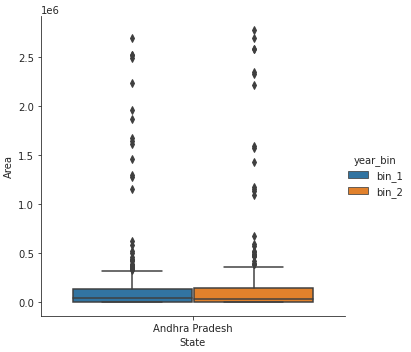

In [45]:
with sns.axes_style(style='ticks'):
    g = sns.factorplot("State", "Area", "year_bin", data=df_ap, kind="box")

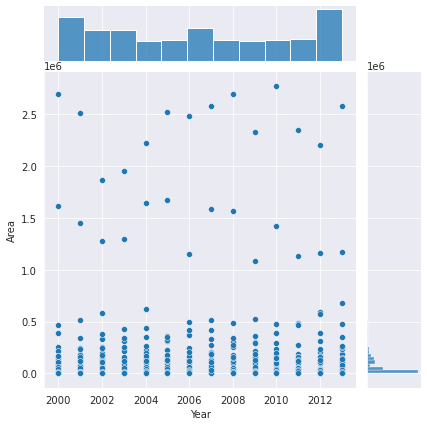

In [46]:
with sns.axes_style('darkgrid'):
    sns.jointplot("Year", "Area", data=df_ap)

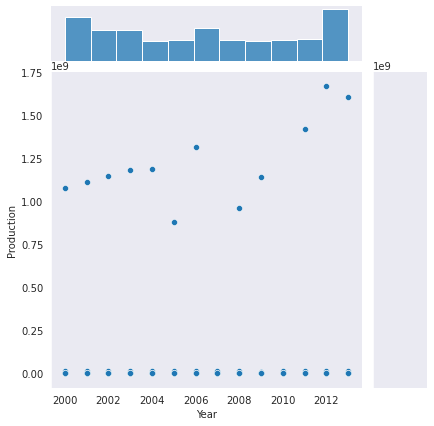

In [47]:
with sns.axes_style('dark'):
    sns.jointplot("Year", "Production", data=df_ap)

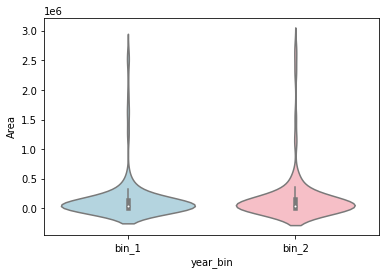

In [48]:
sns.violinplot("year_bin", "Area", data=df_ap,
               palette=["lightblue", "lightpink"]);

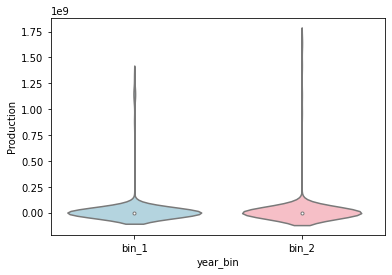

In [49]:
sns.violinplot("year_bin", "Production", data=df_ap,
               palette=["lightblue", "lightpink"]);

# Encoding

In [50]:
df_ap_encoded=pd.get_dummies(df_ap.Crop)

In [51]:
df_ap_encoded.head()

,Arecanut,Arhar/Tur,Bajra,Banana,Beans & Mutter(Vegetable),Bhindi,Bottle Gourd,Brinjal,Cabbage,Cashewnut,...,Tapioca,Tobacco,Tomato,Turmeric,Urad,Varagu,Wheat,other fibres,other misc. pulses,other oilseeds
93,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
94,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
95,0,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
96,0,0,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
97,0,0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


In [52]:
df_ap_encoded_2=pd.get_dummies(df_ap.year_bin)

In [53]:
df_ap_encoded_2.head()

,bin_1,bin_2
93,1,0
94,1,0
95,1,0
96,1,0
97,1,0


# Discritisation

In [54]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df_ap["Area_range"] = est.fit_transform(df_ap[['Area']])

In [55]:
df_ap[df_ap.Area_range>0].head()

,State,Year,Crop,Area,Production,year_bin,Area_range
105,Andhra Pradesh,2000,Groundnut,1611003.0,1846501.0,bin_1,2.0
121,Andhra Pradesh,2000,Rice,2694741.0,8040667.0,bin_1,4.0
147,Andhra Pradesh,2001,Groundnut,1454023.0,1000135.0,bin_1,2.0
162,Andhra Pradesh,2001,Rice,2515353.0,7823692.0,bin_1,4.0
196,Andhra Pradesh,2002,Groundnut,1275160.0,660124.0,bin_1,2.0


# Visualisations

In [56]:
from sklearn.preprocessing import KBinsDiscretizer
est = KBinsDiscretizer(n_bins=5, encode='ordinal', strategy='uniform')
df["Area_range"] = est.fit_transform(df[['Area']])

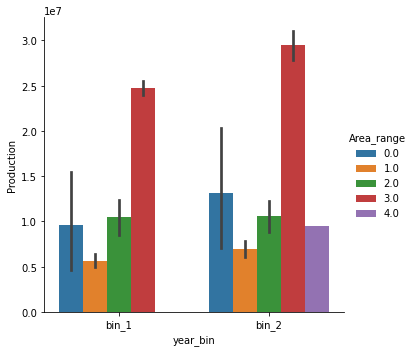

In [57]:
sns.catplot(y="Production", x="year_bin",hue="Area_range", kind="bar", data=df)

In [58]:
a=pd.DataFrame(df_ap.groupby("year_bin").Production.mean())

<AxesSubplot:xlabel='year_bin', ylabel='Production'>

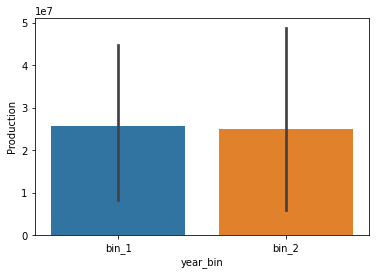

In [59]:
sns.barplot(x="year_bin",y="Production",data=df_ap)

In [60]:
a.columns

Index(['Production'], dtype='object')

In [61]:
a

,Production
year_bin,
bin_1,2.564105e+07
bin_2,2.506560e+07


<AxesSubplot:xlabel='Production', ylabel='State'>

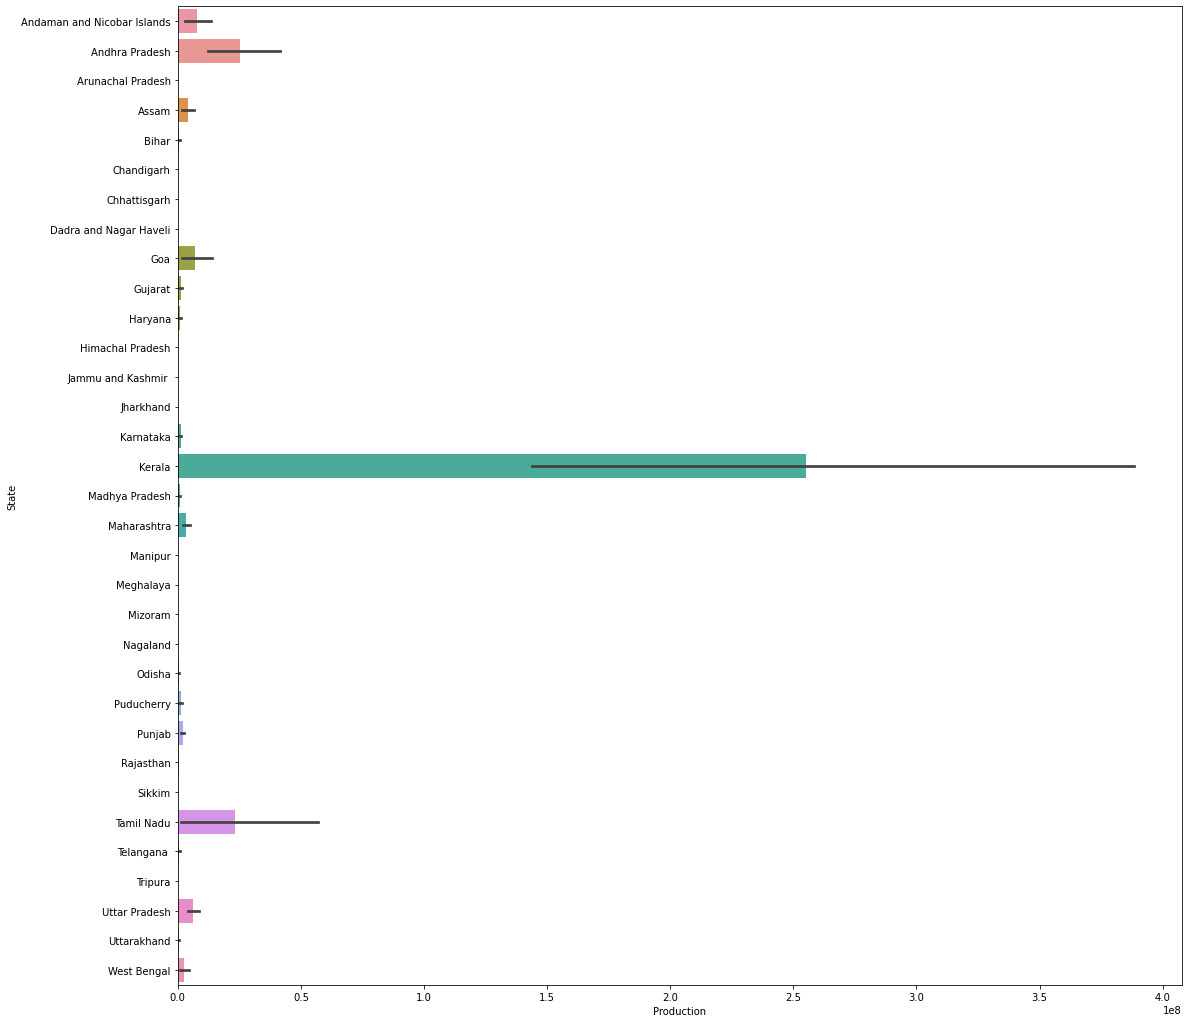

In [64]:
plt.figure(figsize= (18,18))
sns.barplot(x=df['Production'],y= df["State"], orient='h')

<AxesSubplot:xlabel='Area', ylabel='State'>

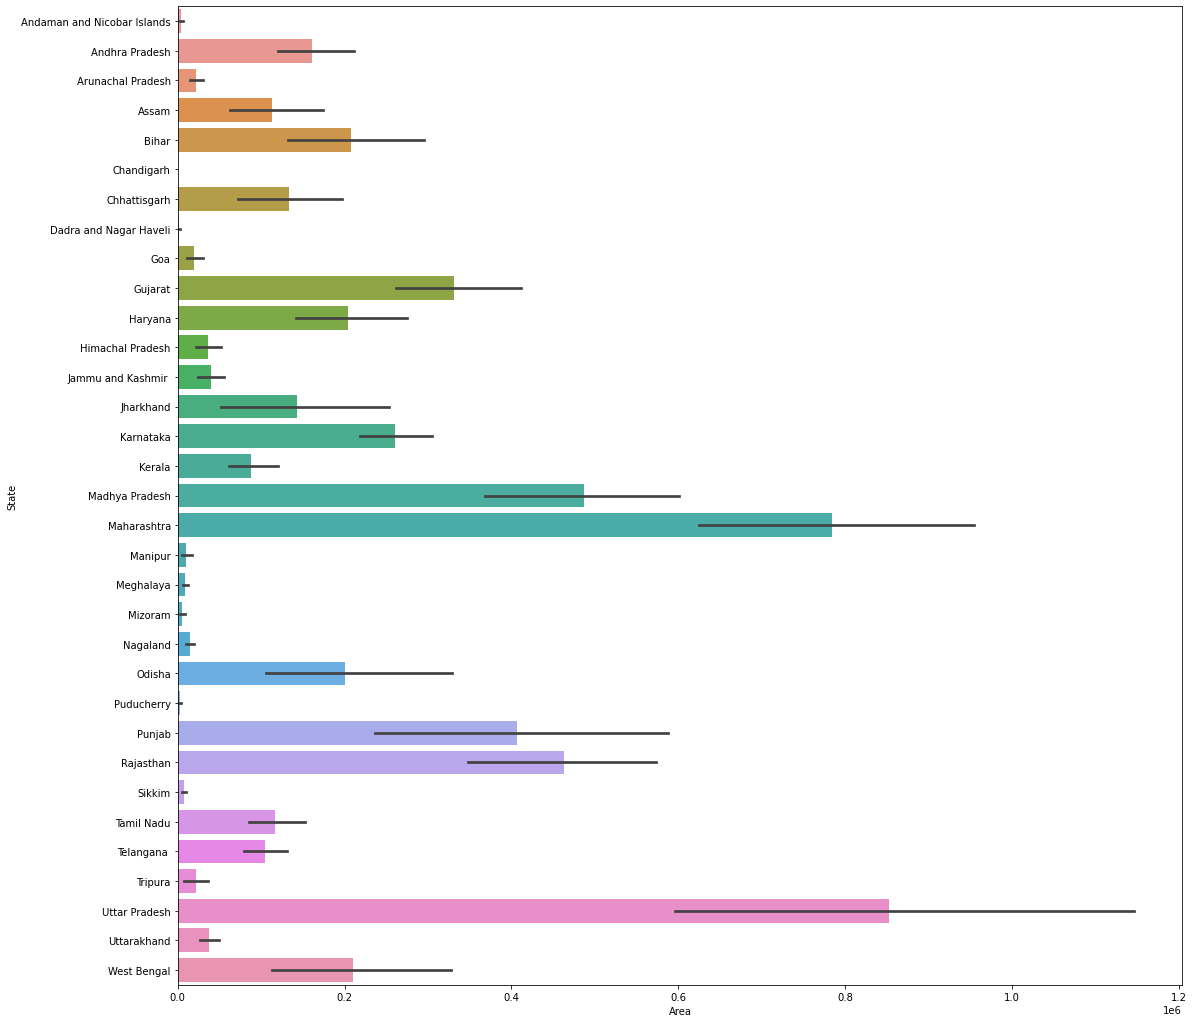

In [69]:
plt.figure(figsize= (18,18))
sns.barplot(x=df[df.year_bin=="bin_1"]['Area'],y= df[df.year_bin=="bin_1"]["State"], orient='h')

<AxesSubplot:xlabel='Production', ylabel='State'>

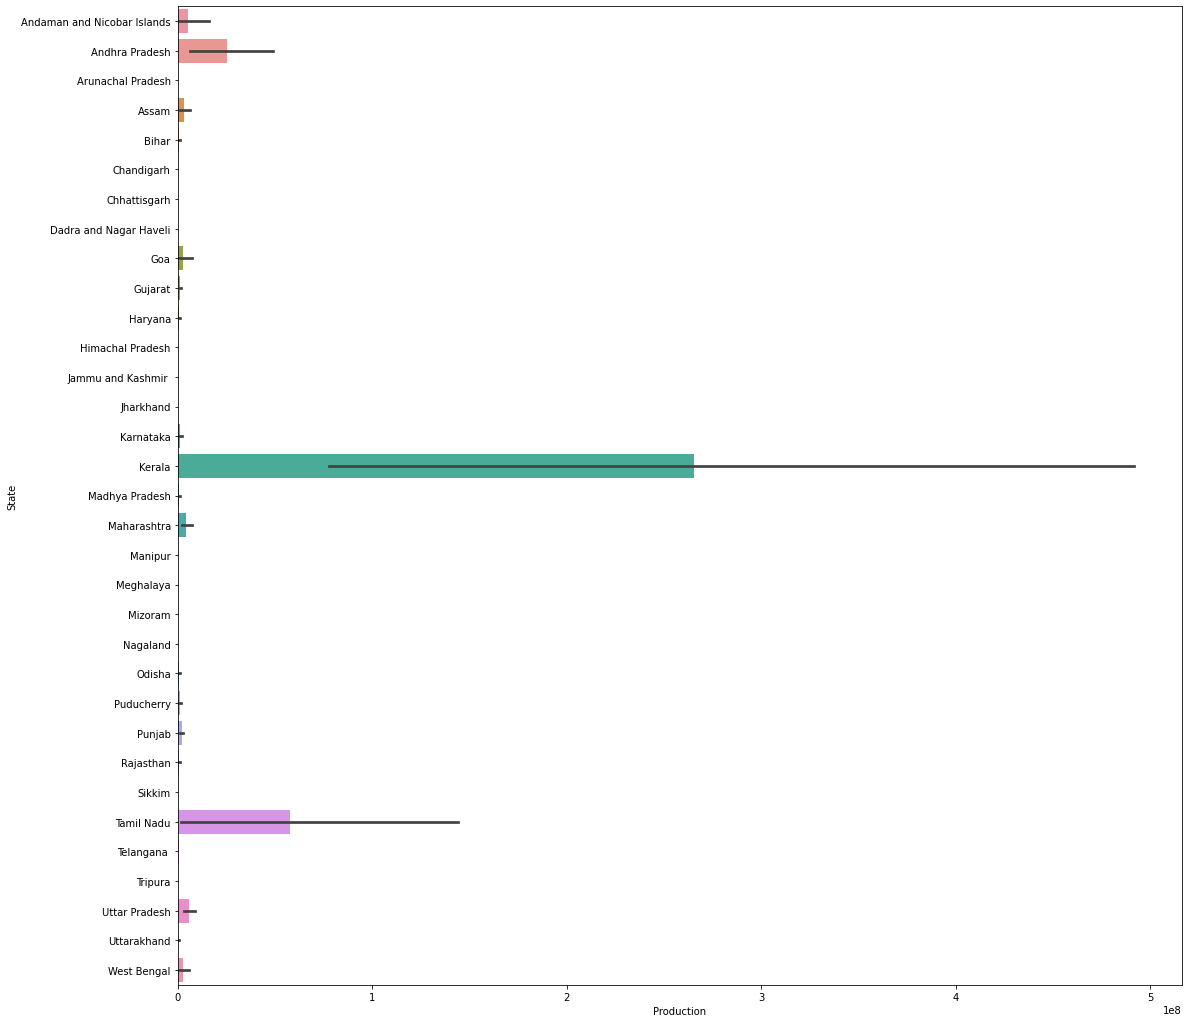

In [68]:
plt.figure(figsize= (18,18))
sns.barplot(x=df[df.year_bin=="bin_2"]['Production'],y= df[df.year_bin=="bin_2"]["State"], orient='h')

<AxesSubplot:xlabel='Area', ylabel='State'>

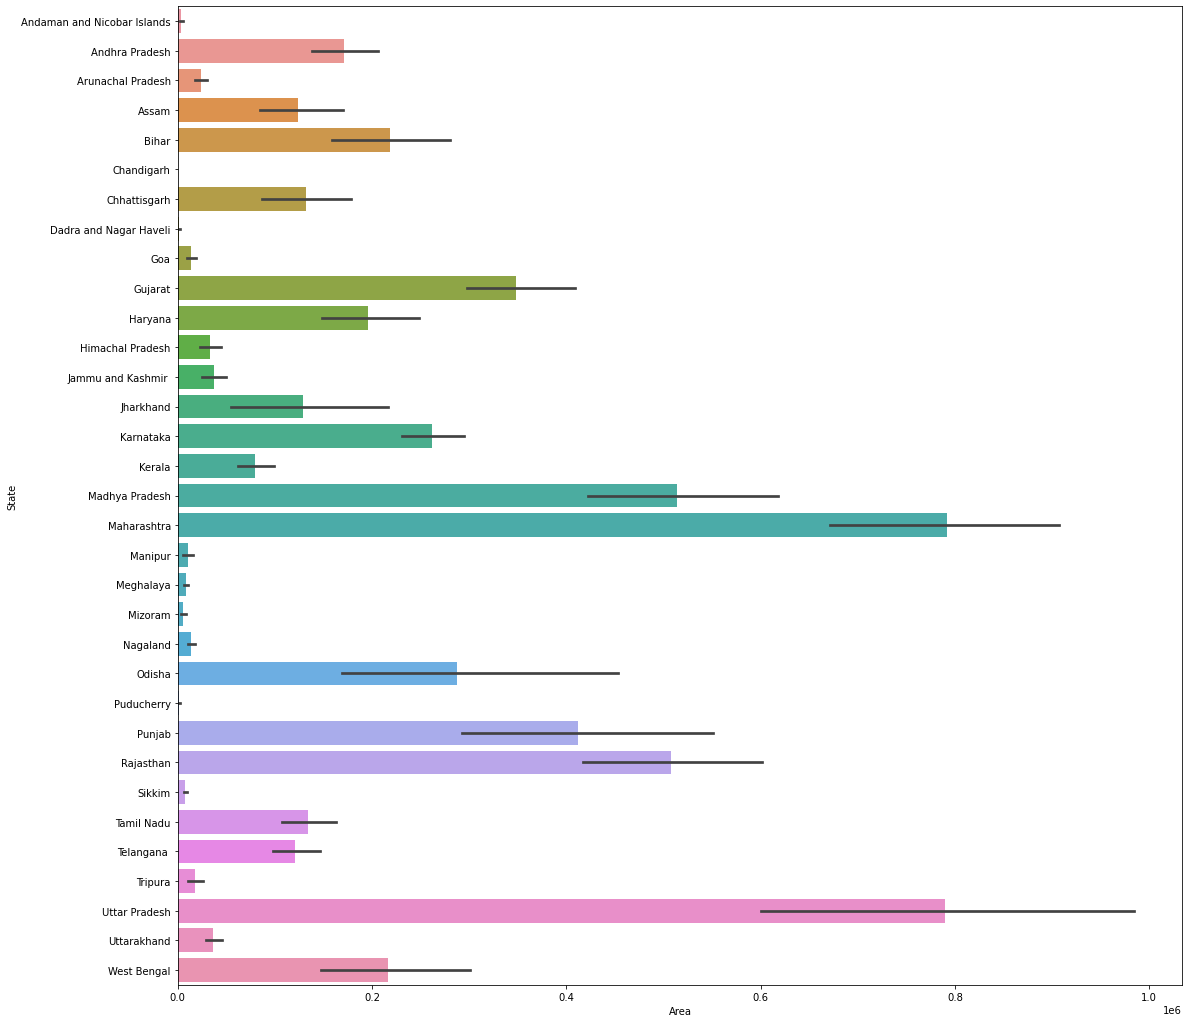

In [65]:
plt.figure(figsize= (18,18))
sns.barplot(x=df['Area'],y= df["State"], orient='h')